In [1]:
#Building a dog breeds image classification model.

#Using a deep learning neural network model to identify the breed of a dog from the image. 
#Dataset was downloaded from the kaggle website at https://www.kaggle.com/c/dog-breed-identification/data


In [2]:
#Importing libraries and packages

#Data management, analysis and visualization
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#Image manipulation
import PIL.Image
from IPython.display import display

#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [3]:
#Loading paths to the train and test images

train= 'train/train/'
test = 'test/test/'

In [4]:
#Load labels and sample submission (test)

labels = pd.read_csv('labels.csv/labels.csv')
testf = pd.read_csv('sample_submission.csv/sample_submission.csv')



In [5]:
#Exploring the labels data

labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [7]:
#In the labels dataframe, group by breeds to determine the number of images belonging to each breed.
breed = labels.groupby("breed").count()
breed = breed.rename(columns = {"id" : "count"})
breed = breed.sort_values("count", ascending=False)
breed.head()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


In [8]:
# Get the number of classes
labelsb = np.unique(labels.breed)
numClasses = labelsb.size
print(numClasses)


120


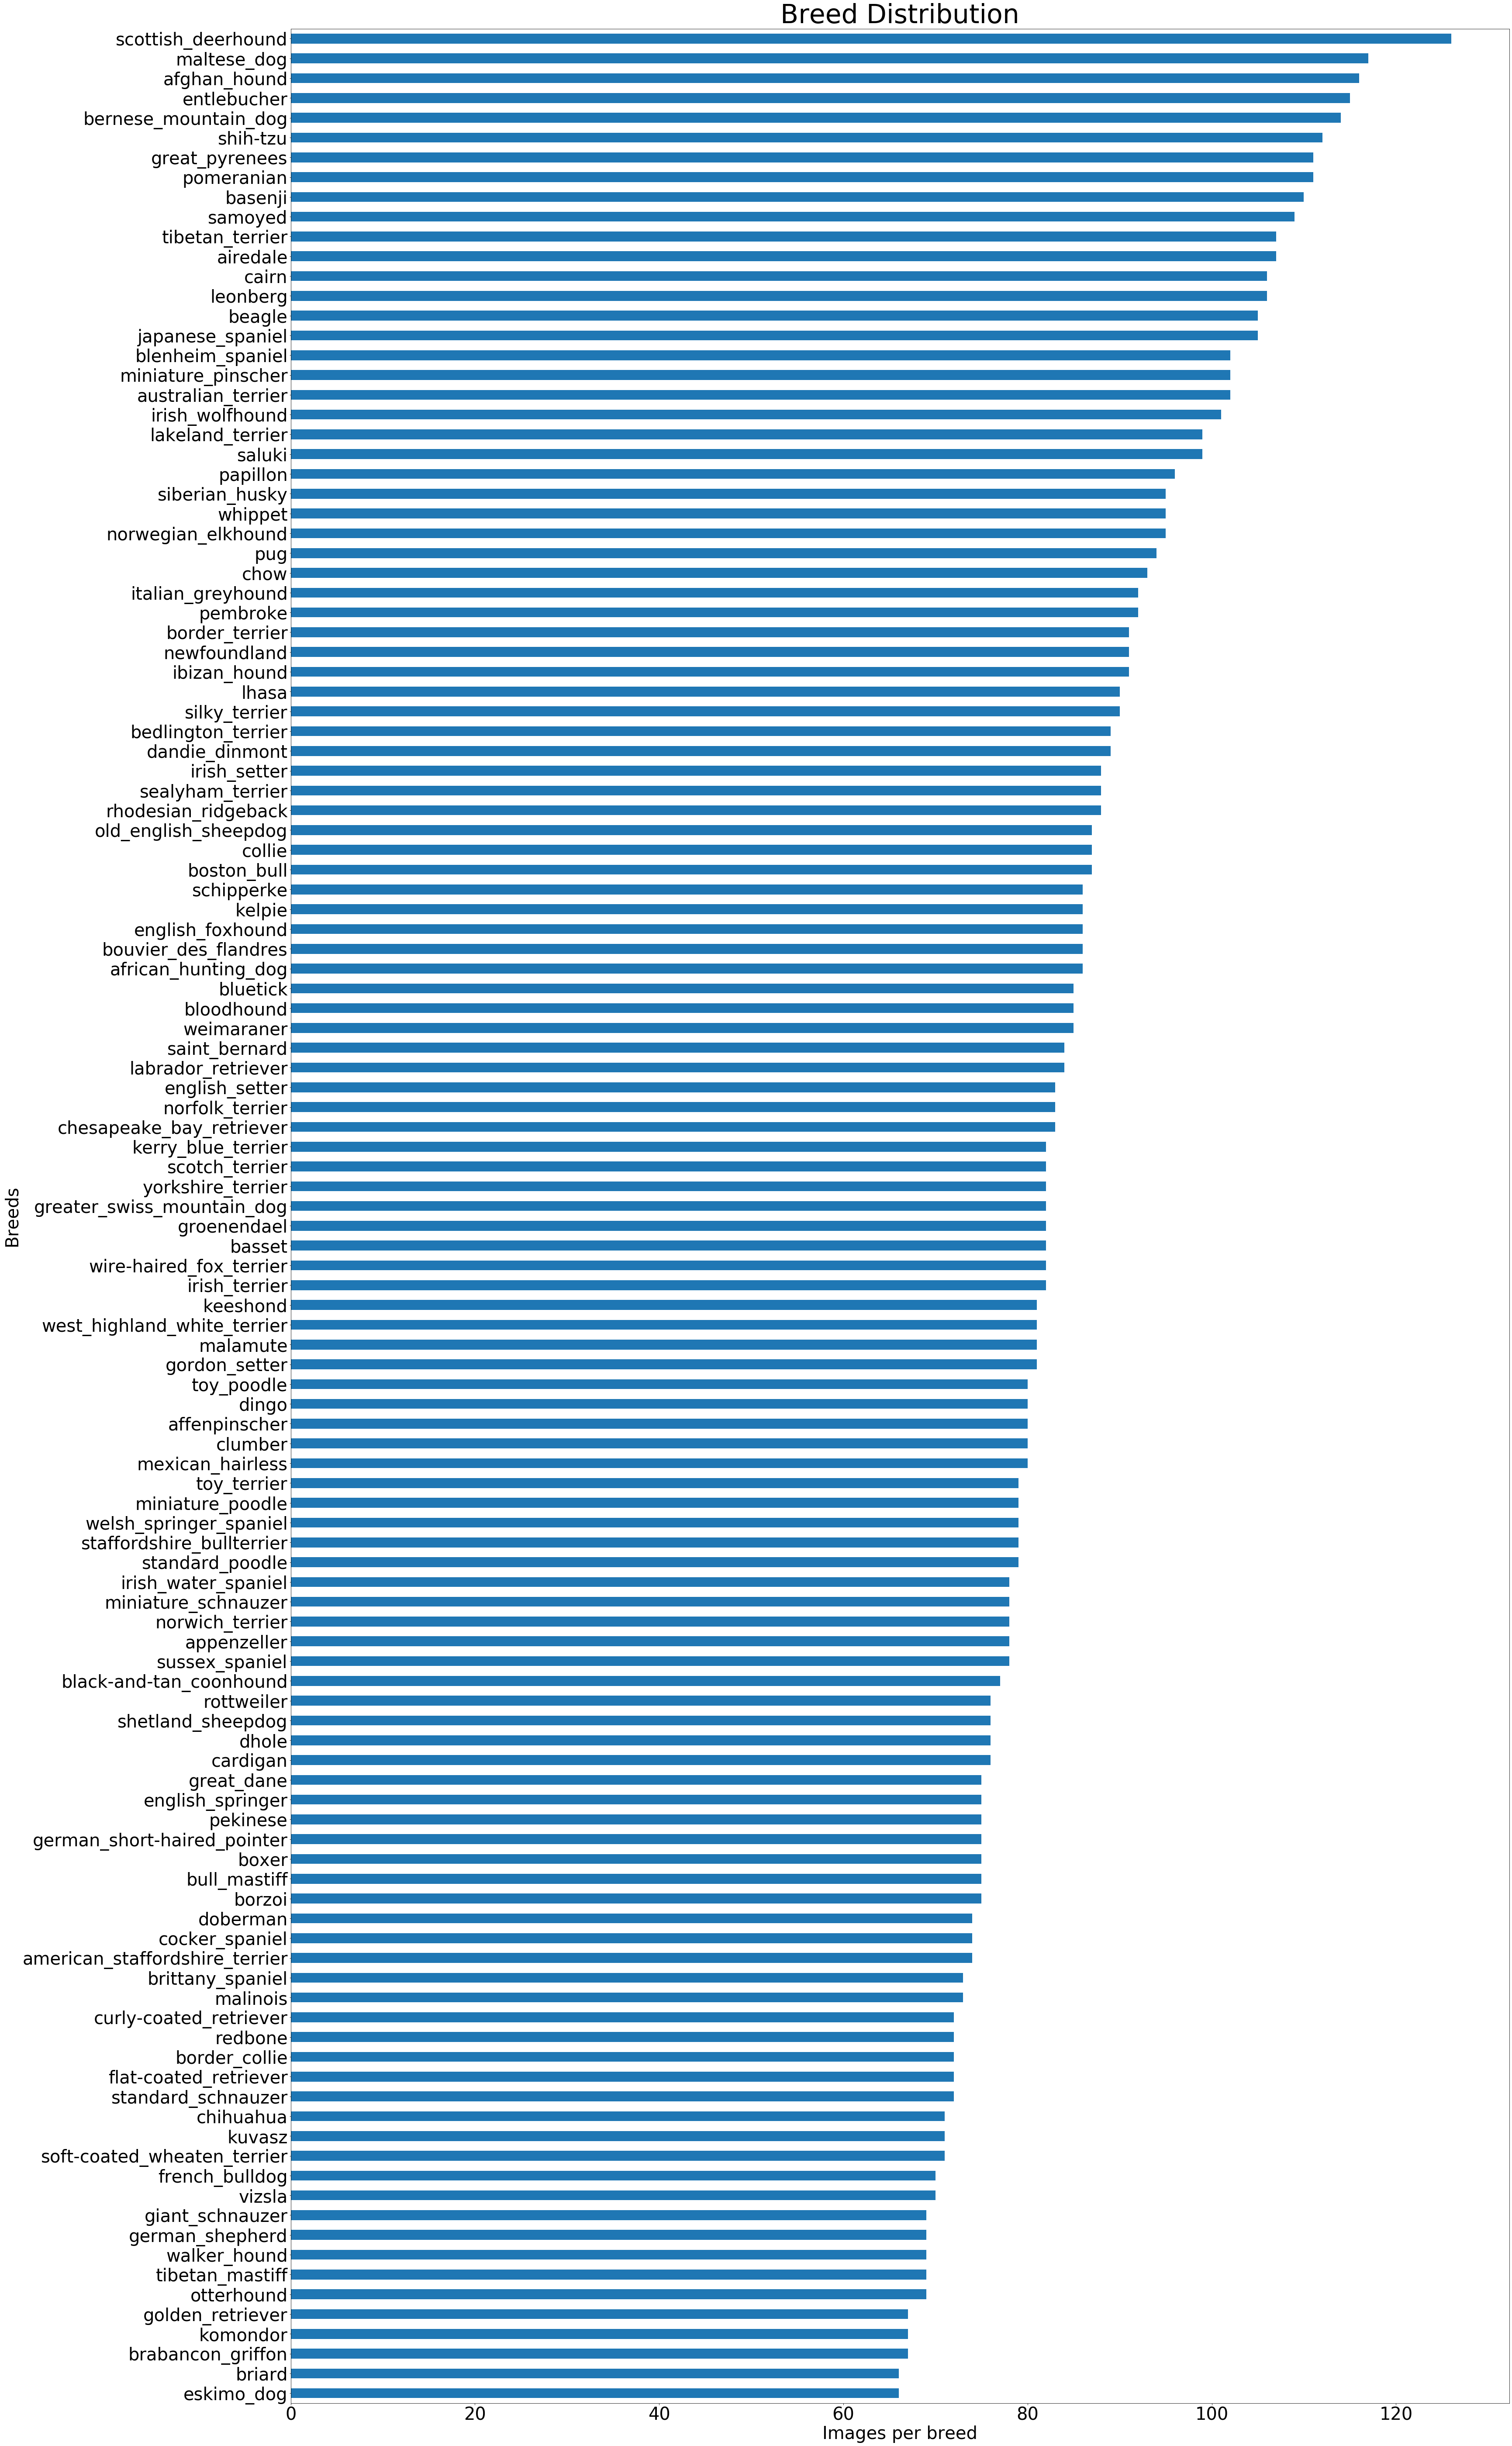

In [9]:
#Plotting distribution of the breeds

dist =pd.value_counts(labels['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title= "Breed Distribution",
                                                       figsize=(50,100))
dist.set(xlabel="Images per breed", ylabel="Breeds")
dist.xaxis.label.set_size(40)
dist.yaxis.label.set_size(40)
dist.title.set_size(60)
plt.show()

In [10]:
#Select only the top 30 breeds 

breeds =list(labels.breed.value_counts()[0:30].index)
breeds

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'tibetan_terrier',
 'airedale',
 'cairn',
 'leonberg',
 'beagle',
 'japanese_spaniel',
 'blenheim_spaniel',
 'miniature_pinscher',
 'australian_terrier',
 'irish_wolfhound',
 'lakeland_terrier',
 'saluki',
 'papillon',
 'siberian_husky',
 'whippet',
 'norwegian_elkhound',
 'pug',
 'chow',
 'italian_greyhound',
 'pembroke']

In [11]:
#Create another dataframe with just the top 30 breeds 

labels30 = labels[labels.breed.isin(breeds)]
labels30.head()


,id,breed
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
12,00693b8bc2470375cc744a6391d397ec,maltese_dog
18,007ff9a78eba2aebb558afea3a51c469,lakeland_terrier
29,00bee065dcec471f26394855c5c2f3de,cairn


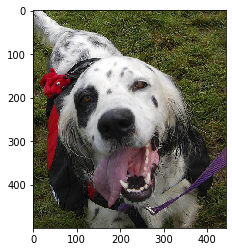

In [12]:
#Visualizing a single image using matplotlib

single_img = image.load_img('train/train/00e9ed3fab1d2032603d1a90e557976f.jpg')
plt.imshow(single_img)





In [13]:
#A function that adds a third column 'path' to the labels dataframes
#Appending the path to the image in the path column.

def addColumn (data,f):
    data = data.assign(path=lambda x: f + x['id'] +'.jpg')
    return data

labels = addColumn(labels,train)

labels.head()


,id,breed,path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,train/train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,train/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,train/train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,train/train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,train/train/0021f9ceb3235effd7fcde7f7538ed62.jpg


In [14]:
#Predicting the entire test set

test_data = addColumn(testf,test)
test_data.head()



,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,path
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,test/test/000621fb3cbb32d8935728e48679680e.jpg
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,test/test/00102ee9d8eb90812350685311fe5890.jpg
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,test/test/0012a730dfa437f5f3613fb75efcd4ce.jpg
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,test/test/001510bc8570bbeee98c8d80c8a95ec1.jpg
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,test/test/001a5f3114548acdefa3d4da05474c2e.jpg


In [15]:
#function to convert image files to numpy array

def convert_img(path):
    #path - path to the image file
    #returns image as numpy array
    img = image.load_img(path, target_size = (64,64))
    img = image.img_to_array(img)
    return img




In [16]:
#Convert train and test images into numpy arrays and resize the images

X =np.array([convert_img(img)
                    for img in labels['path'].values.tolist()])


X.shape

(10222, 64, 64, 3)

In [17]:
test_img = np.array([convert_img(img)
                   for img in test_data['path'].values.tolist()])
test_img.shape

(10357, 64, 64, 3)

In [18]:
#Applying  label encoder to the breeds column in labels breed column
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(labels['breed'].values)
#labels_b = labels30.breed
#labels_b =pd.get_dummies(labels30.breed)
Y


array([19, 37, 85, ...,  3, 75, 28])

In [19]:
#Convert 1-dimensional class arrays to 30-dimensional class matrices for labels[breed]
Y= np_utils.to_categorical(Y, 120)
Y.shape



(10222, 120)

In [20]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    stratify=Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(8177, 64, 64, 3)
(8177, 120)
(2045, 64, 64, 3)
(2045, 120)


In [21]:
#Convert data type 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [41]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 120, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# model summmary
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_12 (Dense)             (None, 120)              

In [42]:
#Data Augmentation

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(X_train)
test_datagen.fit(X_test)


training_set =  train_datagen.flow(X_train,Y_train,batch_size=32)
testing_set  =  test_datagen.flow(X_test,Y_test,batch_size=32)


In [43]:
#Fitting the CNN to the images

classifier.fit_generator(training_set,
                      steps_per_epoch = 20,
                      validation_data = testing_set,
                      validation_steps = 40,
                      epochs = 10,
                      verbose = 1)

Epoch 1/10
20/20 [==============================] - 6s 320ms/step - loss: 4.8175 - accuracy: 0.0078 - val_loss: 4.7913 - val_accuracy: 0.0078
Epoch 2/10
20/20 [==============================] - 6s 293ms/step - loss: 4.7906 - accuracy: 0.0064 - val_loss: 4.7798 - val_accuracy: 0.0070
Epoch 3/10
20/20 [==============================] - 6s 303ms/step - loss: 4.7898 - accuracy: 0.0156 - val_loss: 4.8045 - val_accuracy: 0.0086
Epoch 4/10
20/20 [==============================] - 6s 311ms/step - loss: 4.7893 - accuracy: 0.0141 - val_loss: 4.7935 - val_accuracy: 0.0078
Epoch 5/10
20/20 [==============================] - 6s 310ms/step - loss: 4.7923 - accuracy: 0.0188 - val_loss: 4.8157 - val_accuracy: 0.0102
Epoch 6/10
20/20 [==============================] - 6s 290ms/step - loss: 4.7912 - accuracy: 0.0172 - val_loss: 4.7931 - val_accuracy: 0.0117
Epoch 7/10
20/20 [==============================] - 6s 294ms/step - loss: 4.7861 - accuracy: 0.0063 - val_loss: 4.8037 - val_accuracy: 0.0094
Epoch 

In [44]:
#Using CNN model to make predictions for the test set

results = classifier.predict_classes(X_test,  verbose=0)



In [45]:
score = classifier.evaluate(X_test, Y_test, verbose=0)
print(score)

[10.408606162689134, 0.011246943846344948]


In [28]:
#Applying the model to the images in the test folder
#try predicting a single image
single_image = convert_img('test/test/00a3edd22dc7859c487a64777fc8d093.jpg')

single_image = np.expand_dims(single_image, axis = 0)
pred = classifier.predict(single_image)


In [46]:
#Apply model to the test images

test_results = classifier.predict_classes(test_img, verbose = 0)



In [47]:
print(test_results)
#testf2 = testf.drop("id", axis=1)
#testf2.head()

[1 1 1 ... 1 1 1]


In [41]:
# Set column names of the breeds from sample_submission 

#submission.columns = testf2.columns.values

# Insert the column id from the sample_submission at the start of the data frame
#submission.insert(0, 'id', testf['id'])

#submission.to_csv('new_submission.csv', index=False)